In [4]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
from matplotlib import style
from symbols import load_ticker, save_ticker
from algorithm import calc_absolute_momentum


# disable pandas warning 
pd.options.mode.chained_assignment = None

# folders
TICKERS_FOLDER = '.\\data\\tickers'     # tickers folder
OUTPUT_FOLDER = '.\\data\\output'       # result folder 

In [5]:
action = 1      # how often do we evaluate and 'take' action
lookback = 253   # what is te lookback duration 
ticker = 'MSFT'   # the ticker

# dates to back test
start_date = '1970-01-01'  
end_date = dt.datetime.now().strftime('%Y-%m-%d') 


In [6]:
# read from csv
df = load_ticker(ticker, start_date, end_date, TICKERS_FOLDER, False)
print(df)


High         Low        Open       Close        Volume  \
Date                                                                       
1986-03-13    0.101562    0.088542    0.088542    0.097222  1.031789e+09   
1986-03-14    0.102431    0.097222    0.097222    0.100694  3.081600e+08   
1986-03-17    0.103299    0.100694    0.100694    0.102431  1.331712e+08   
1986-03-18    0.103299    0.098958    0.102431    0.099826  6.776640e+07   
1986-03-19    0.100694    0.097222    0.099826    0.098090  4.789440e+07   
...                ...         ...         ...         ...           ...   
2020-06-12  191.720001  185.179993  190.539993  187.740005  4.334570e+07   
2020-06-15  190.820007  184.009995  184.580002  188.940002  3.277020e+07   
2020-06-16  195.580002  191.460007  192.889999  193.570007  4.255670e+07   
2020-06-17  196.320007  193.690002  195.029999  194.240005  2.565590e+07   
2020-06-18  196.490005  194.000000  194.000000  196.320007  2.301720e+07   

             Adj Close  
Date

In [7]:
df_res = calc_absolute_momentum(df, action, lookback)
print(df_res)


Close  Daily return  lookback window Abs Close RISK
Date                                                                
1986-03-13    0.097222           NaN              NaN               
1986-03-14    0.100694      0.035714              NaN               
1986-03-17    0.102431      0.017241              NaN               
1986-03-18    0.099826     -0.025424              NaN               
1986-03-19    0.098090     -0.017391              NaN               
...                ...           ...              ...       ...  ...
2020-06-12  187.740005      0.007892         0.427789               
2020-06-15  188.940002      0.006392         0.427902               
2020-06-16  193.570007      0.024505         0.461457               
2020-06-17  194.240005      0.003461         0.462100               
2020-06-18  196.320007      0.010708         0.452501               

[8638 rows x 5 columns]
start algo run from 253 until 8638
still running - 261
still running - 271
still running - 281


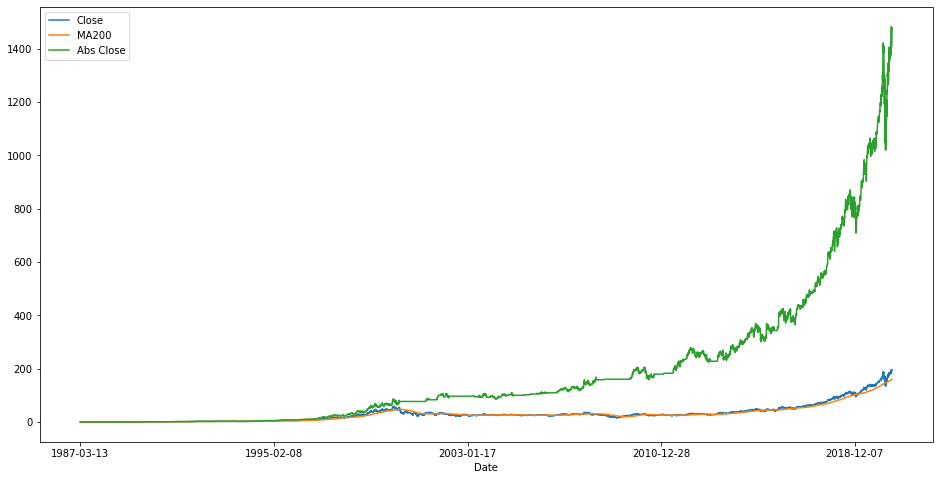

In [8]:
df_res['MA200'] = df_res['Close'].rolling(200).mean()
df_res.dropna()[['Close', 'MA200', 'Abs Close']].plot(label=ticker, figsize=(16,8))
#df_res['Abs Close'].plot(label=ticker, figsize=(16,8))